In [5]:
! wget http://cb.lk/covid_19

--2021-12-21 11:32:35--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-12-21 11:32:36--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-12-21 11:32:36--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-12

In [6]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image

Loading Dataset

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train_data=train_datagen.flow_from_directory(directory="/content/CovidDataset/Train",
                                             target_size=(128,128),
                                             batch_size=512,
                                             class_mode='binary')

Found 224 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
test_datagen = image.ImageDataGenerator(
    rescale=1./255,

)

test_data=test_datagen.flow_from_directory(directory="/content/CovidDataset/Val",
                                             target_size=(128,128),
                                             batch_size=512,
                                             class_mode='binary')

Found 60 images belonging to 2 classes.


CNN Model

In [11]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.6559 - acc: 0.5714 - val_loss: 0.6717 - val_acc: 0.6833
Epoch 2/10
1/1 [==============================] - 9s 9s/step - loss: 0.6399 - acc: 0.6741 - val_loss: 0.6565 - val_acc: 0.8833
Epoch 3/10
1/1 [==============================] - 9s 9s/step - loss: 0.6080 - acc: 0.7946 - val_loss: 0.6310 - val_acc: 0.9333
Epoch 4/10
1/1 [==============================] - 9s 9s/step - loss: 0.5555 - acc: 0.8616 - val_loss: 0.5923 - val_acc: 0.9333
Epoch 5/10
1/1 [==============================] - 9s 9s/step - loss: 0.4994 - acc: 0.8571 - val_loss: 0.5297 - val_acc: 0.9333
Epoch 6/10
1/1 [==============================] - 9s 9s/step - loss: 0.4146 - acc: 0.8750 - val_loss: 0.4452 - val_acc: 0.9333
Epoch 7/10
1/1 [==============================] - 9s 9s/step - loss: 0.3746 - acc: 0.8616 - val_loss: 0.3620 - val_acc: 0.9333
Epoch 8/10
1/1 [==============================] - 9s 9s/step - loss: 0.3396 - acc: 0.8482 - val_loss: 0.3142 

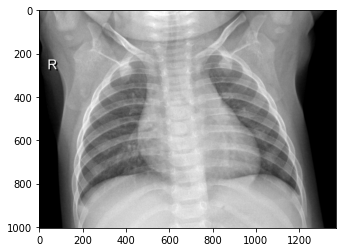

In [15]:
import cv2 
img=cv2.imread(r"/content/CovidDataset/Train/Normal/IM-0182-0001.jpeg")
plt.imshow(img)
plt.show()

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r"/content/CovidDataset/Train/Normal/IM-0182-0001.jpeg", target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_data.class_indices
if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Covid'
print(prediction)

Normal
